In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

In [5]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('/content/Page view.csv', index_col='date', parse_dates=['date'])

# Clean data
df = df[(df.value > df.value.quantile(0.025)) & (df.value < df.value.quantile(0.975))]

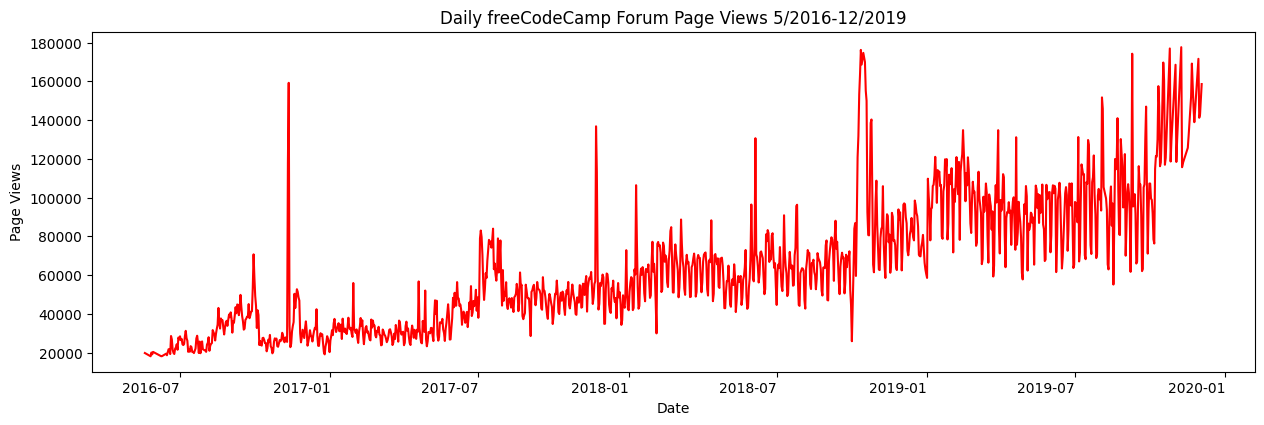

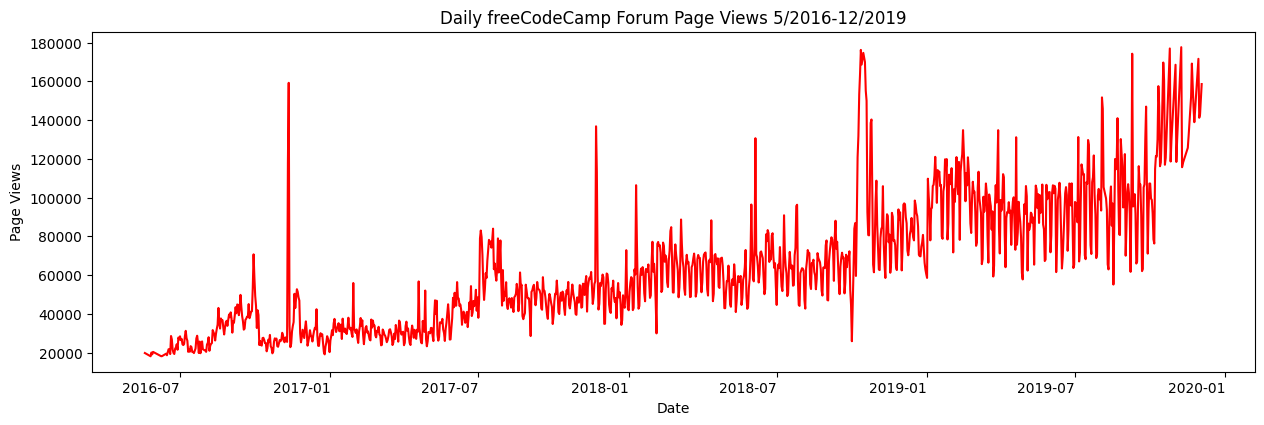

In [6]:
def draw_line_plot():
    # Draw line plot

    fig = df.plot.line(figsize=(15,5), color='red', legend=False);
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019');
    plt.xlabel('Date');
    plt.xticks(rotation = 0)
    plt.ylabel('Page Views');

    fig = fig.figure

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

draw_line_plot()

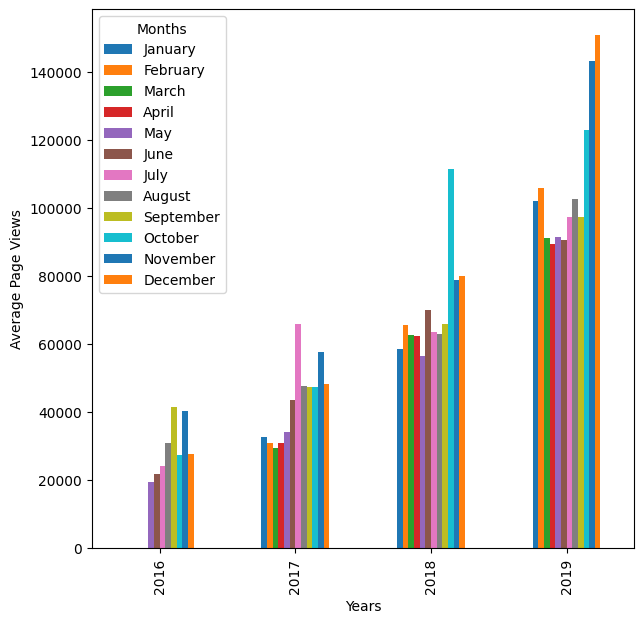

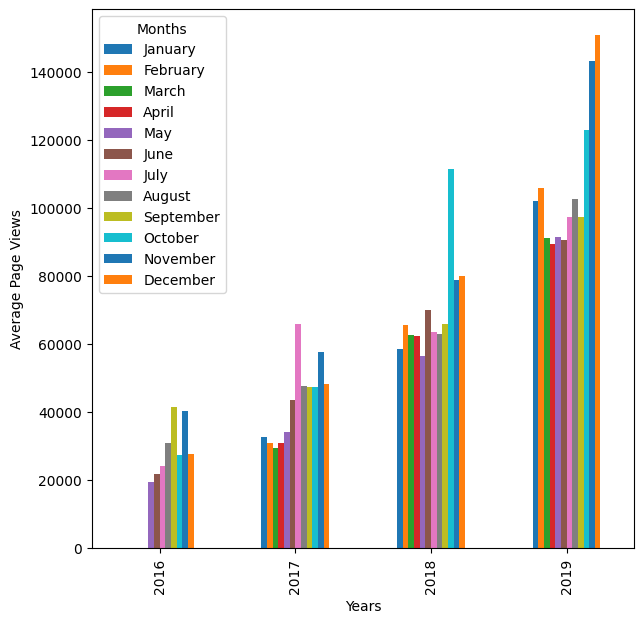

In [8]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['year'] = df.index.year
    df_bar['month'] = df.index.month_name()

    # grouping and orgenizing the df
    df_bar_group = df_bar.groupby(['year', 'month'])['value'].mean()
    df_bar_group = df_bar_group.unstack(level='month')
    df_bar_group = df_bar_group[['January', 'February', 'March', 'April', 'May',
                                'June', 'July', 'August', 'September', 'October', 'November', 'December']]

    # Draw bar plot
    fig = df_bar_group.plot.bar(figsize=(7,7)).figure
    plt.xlabel('Years');
    #plt.xticks(rotation = 0)
    plt.ylabel('Average Page Views');
    plt.legend(title='Months');

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

draw_bar_plot()

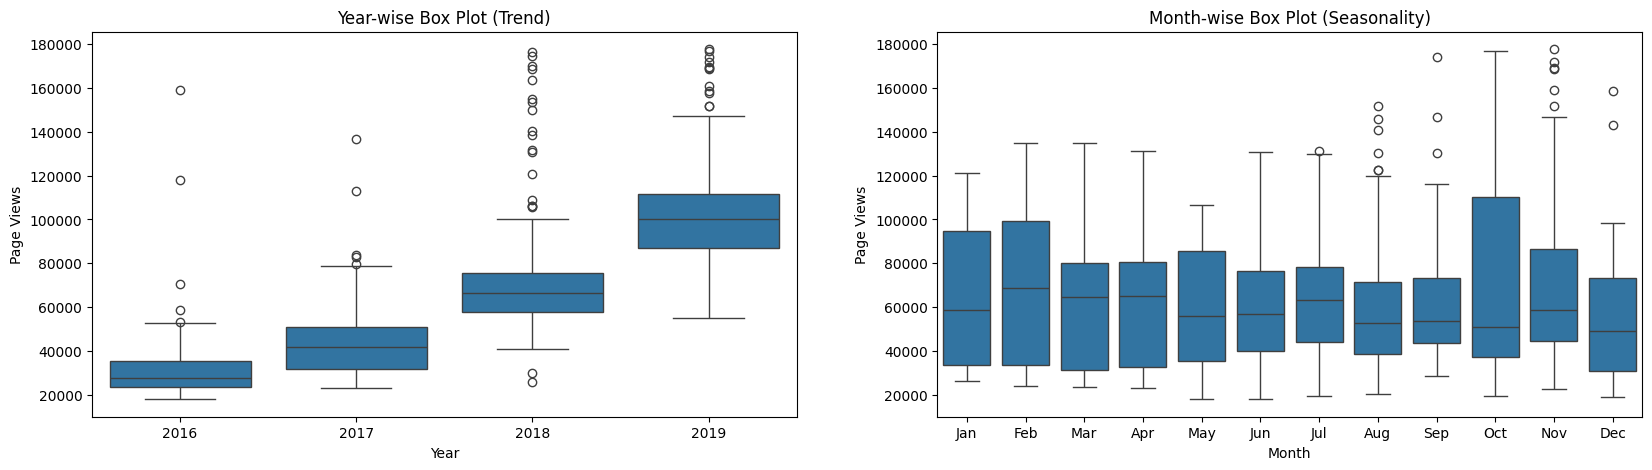

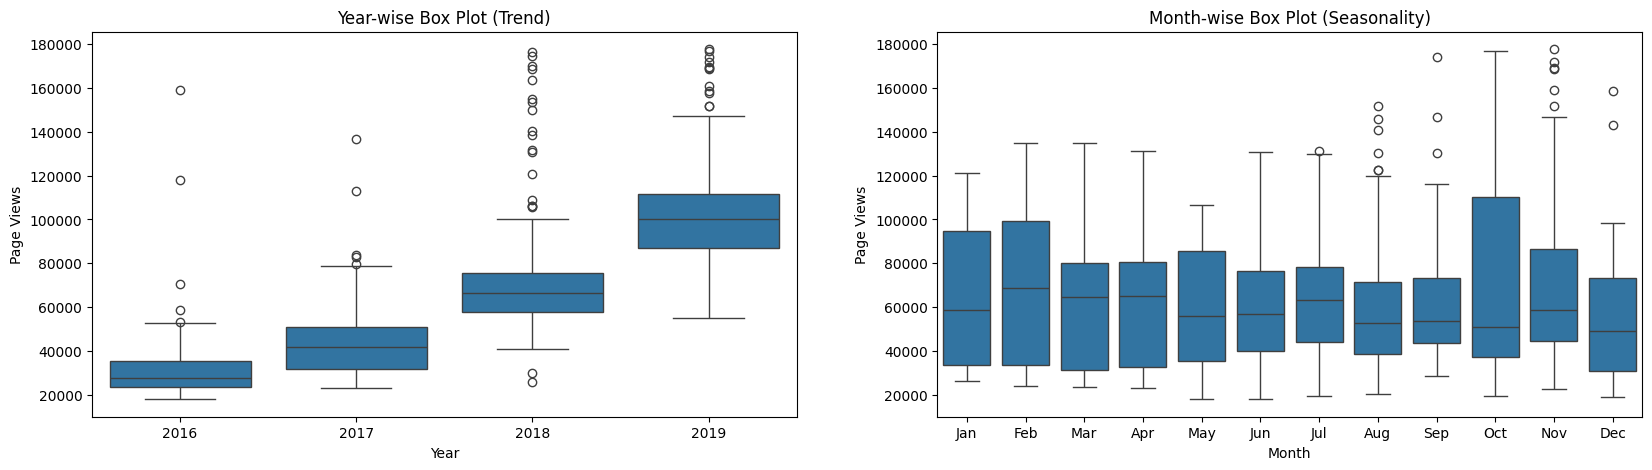

In [9]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    mon_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    # Draw box plots (using Seaborn)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    ax1 = sns.boxplot(data=df_box, x='year', y='value', ax=ax1)
    ax2 = sns.boxplot(data=df_box, x='month', y='value', ax=ax2, order=mon_order);
    ax1.set_ylabel('Page Views')
    ax1.set_xlabel('Year')
    ax1.set_title('Year-wise Box Plot (Trend)')
    ax2.set_ylabel('Page Views')
    ax2.set_xlabel('Month')
    ax2.set_title('Month-wise Box Plot (Seasonality)')

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

draw_box_plot()